In [5]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
from nuscenes.can_bus.can_bus_api import NuScenesCanBus
import matplotlib.pyplot as plt
import numpy as np

In [6]:
nusc = NuScenes(version='v1.0-mini', dataroot='/media/jim/Hard Disk/nuscenes_data/sets/nuscenes', verbose=True)
# nusc = NuScenes(version='v1.0-trainval', dataroot='/media/jim/Hard Disk/nuscenes_data/sets/nuscenes', verbose=True)

nusc_can = NuScenesCanBus(dataroot='/media/jim/Hard Disk/nuscenes_data/sets/nuscenes')

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.328 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [26]:
scene = nusc.scene[9]
current_sample = nusc.get('sample', scene['first_sample_token'])
current_sample['data'].keys()

dict_keys(['RADAR_FRONT', 'RADAR_FRONT_LEFT', 'RADAR_FRONT_RIGHT', 'RADAR_BACK_LEFT', 'RADAR_BACK_RIGHT', 'LIDAR_TOP', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_RIGHT', 'CAM_BACK', 'CAM_BACK_LEFT', 'CAM_FRONT_LEFT'])

In [17]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', current_sample['data']['CAM_FRONT'])
cam_back_data = nusc.get('sample_data', current_sample['data']['CAM_BACK'])
cam_back_left_data = nusc.get('sample_data', current_sample['data']['CAM_BACK_LEFT'])
cam_back_right_data = nusc.get('sample_data', current_sample['data']['CAM_BACK_RIGHT'])

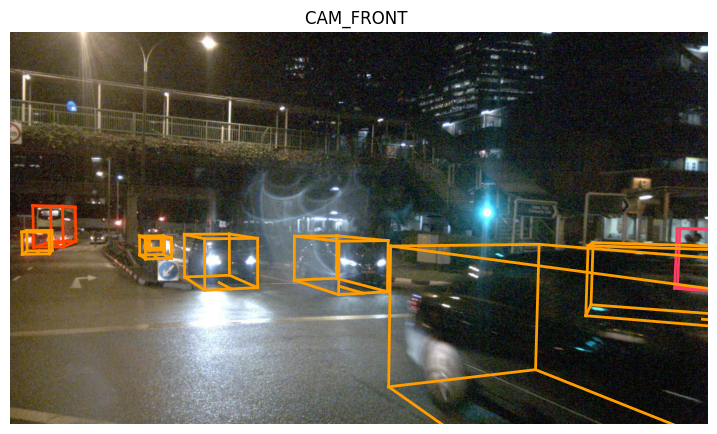

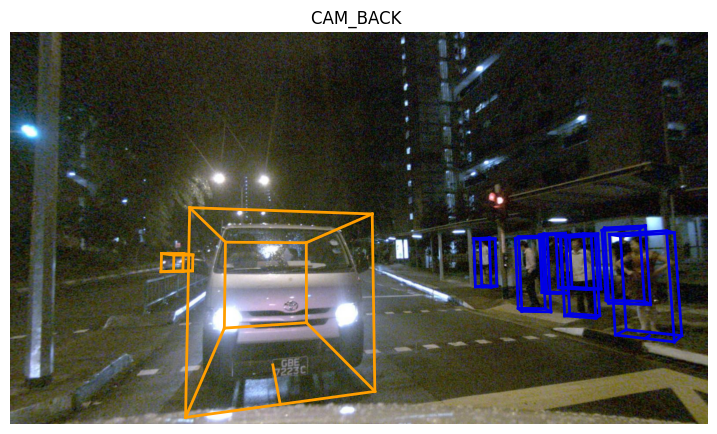

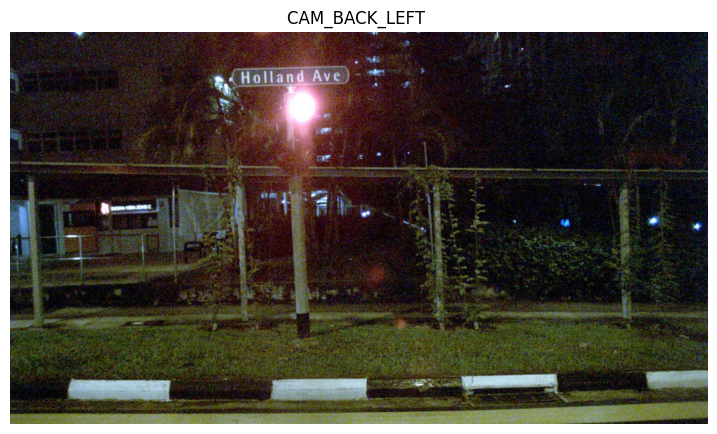

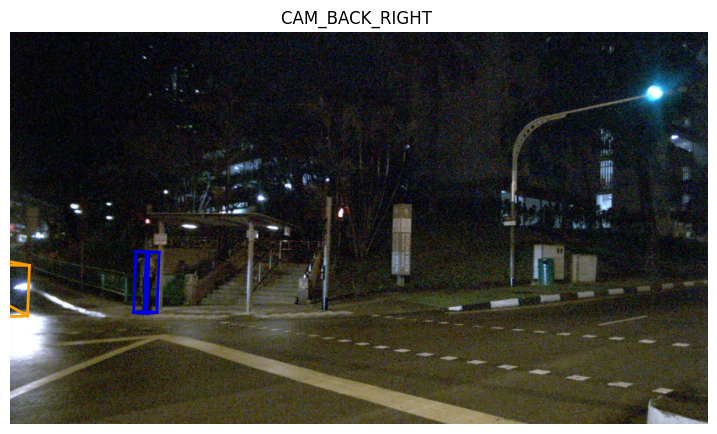

In [18]:
nusc.render_sample_data(cam_front_data['token'], with_anns=True)
nusc.render_sample_data(cam_back_data['token'], with_anns=True)
nusc.render_sample_data(cam_back_left_data['token'], with_anns=True)
nusc.render_sample_data(cam_back_right_data['token'], with_anns=True)

In [28]:
current_sample

{'token': 'a480496a5988410fbe3d8ed6c84da996',
 'timestamp': 1542800987947699,
 'prev': '',
 'next': 'b993550e60054741983f8052ba97b0b0',
 'scene_token': 'e233467e827140efa4b42d2b4c435855',
 'data': {'RADAR_FRONT': '511dba7f4aec41ea8baa9019ba97413c',
  'RADAR_FRONT_LEFT': 'b5a62f9cf0ac444cbd90c2f9ba7fedbf',
  'RADAR_FRONT_RIGHT': 'e95132afd0604448b6d522a09bad7e2d',
  'RADAR_BACK_LEFT': 'cb1a9aa2b8154fde9442eaa9fe11a958',
  'RADAR_BACK_RIGHT': 'f2008e1cb0194ee49a85243ed8261955',
  'LIDAR_TOP': 'b723df2123fe473d85512c9d02156c27',
  'CAM_FRONT': '51ceae8a5ecc4730950666723c135bc8',
  'CAM_FRONT_RIGHT': '4a85ae2a6329487abed596b0b7b6dfa4',
  'CAM_BACK_RIGHT': '646b51a45a2b4494a918ff89d36027e2',
  'CAM_BACK': 'd340a8d85c874b8d9e9ddf51a82a5908',
  'CAM_BACK_LEFT': 'c418396afb5a43a4af9a3b76278fd8d6',
  'CAM_FRONT_LEFT': '255a0637ea9a461989d7fb20f4ee126c'},
 'anns': ['9ca2a9ab9b5041278eea928681e09d89',
  '9dfee0c127f548acb80bf95610437acb',
  'b2222d3c49c447ba91247501e97d772b',
  '723bee443cf6433a9

In [30]:
cam_data = nusc.get('sample_data', current_sample['data'][sensor])
cam_data

{'token': '51ceae8a5ecc4730950666723c135bc8',
 'sample_token': 'a480496a5988410fbe3d8ed6c84da996',
 'ego_pose_token': '51ceae8a5ecc4730950666723c135bc8',
 'calibrated_sensor_token': 'd47224c723db443cb30a6c9d111adb7b',
 'timestamp': 1542800987912460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-11-21-19-38-26+0800__CAM_FRONT__1542800987912460.jpg',
 'prev': '',
 'next': 'fc75e31c39a446cbac3e6ec054fd9172',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

In [32]:
timestamps = []
sample_token_change = []
current_sample = nusc.get('sample', scene['first_sample_token'])
cam_data = nusc.get('sample_data', current_sample['data'][sensor])
timestamps.append(cam_data['timestamp'])
initial_sample_token = cam_data['sample_token']
while not cam_data['next'] == "":
    cam_data = nusc.get('sample_data', cam_data['next'])
    timestamps.append(cam_data['timestamp'])
    sample_token_change.append(cam_data['sample_token'] == initial_sample_token)

# ========
last_time = int(timestamps[-1])
first_time = int(timestamps[0])
print("duration of scene:")
print((last_time - first_time) / (1e6))
print("number of entries:")
print(len(timestamps))
print("averaged time diff in microseconds:")
print((last_time - first_time) / len(timestamps))
print("total frequency:")  #  -> close enough to 100 hz!!
print(len(timestamps) / (last_time - first_time) * (1e6))

duration of scene:
19.500009
number of entries:
232
averaged time diff in microseconds:
84051.76293103448
total frequency:
11.89743040631417


In [11]:
nusc.get('ego_pose', cam_front_data['ego_pose_token'])

{'token': 'e3d495d4ac534d54b321f50006683844',
 'timestamp': 1532402927612460,
 'rotation': [0.5720063498929273,
  -0.0021434844534272707,
  0.011564094980151613,
  -0.8201648693182716],
 'translation': [411.4199861830012, 1181.197175631848, 0.0]}

In [14]:
scene_name = scene['name']
print(scene_name)
nusc_can.print_all_message_stats(scene_name)

scene-0061
{
  "ms_imu": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "pose": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "steeranglefeedback": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "vehicle_monitor": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "zoesensors": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "zoe_veh_info": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ]
}


In [15]:
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
print("ms_imu")
print(ms_imu[0])
print("pose")
print(pose[0])

ms_imu
{'linear_accel': [-0.41128969192504883, -0.4808080792427063, 10.184659004211426], 'q': [0.1937936693429947, -0.00936870463192463, -0.015247208997607231, 0.9808790683746338], 'rotation_rate': [0.011562108993530273, 0.027134936302900314, 0.016453981399536133], 'utime': 1532402927649034}
pose
{'accel': [-0.5754005977462526, -0.21511667861912834, 10.015971965254076], 'orientation': [0.5721097147684122, 0.0, 0.0, -0.8201770993313615], 'pos': [411.2494814111038, 1180.7432096568386, 0.0], 'rotation_rate': [0.004477957729250193, 0.02866952493786812, 0.017157725989818573], 'utime': 1532402927665106, 'vel': [8.988725931436823, 0.0, 0.0]}


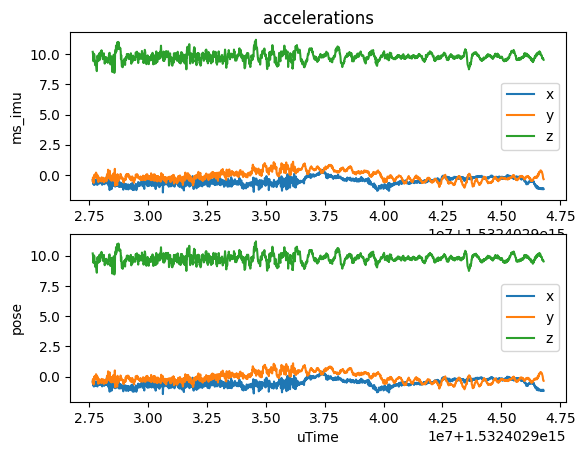

In [16]:
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
ms_imu_rot = np.array([(m['utime'], m['linear_accel'][0], m['linear_accel'][1], m['linear_accel'][2]) for m in ms_imu])

plt.subplot(2, 1, 1)
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 1])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 2])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 3])
plt.title("accelerations")
plt.ylabel('ms_imu')
plt.legend(['x', 'y', 'z'])

pose_rot = np.array([(m['utime'], m['accel'][0], m['accel'][1], m['accel'][2]) for m in pose])

plt.subplot(2, 1, 2)
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 1])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 2])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 3])
plt.xlabel('uTime')
plt.ylabel('pose')
plt.legend(['x', 'y', 'z'])

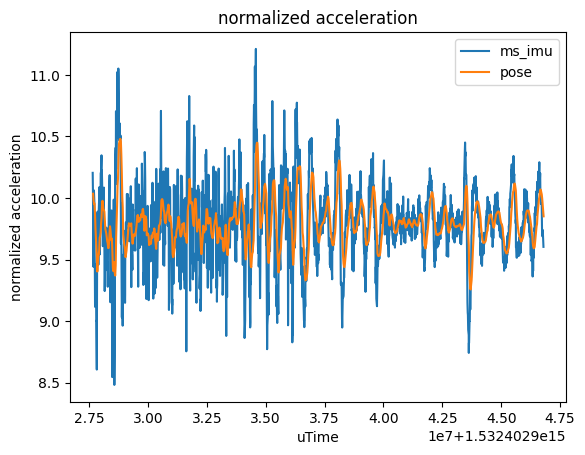

In [17]:
# IMU: Frequency: 100Hz; Pose: Frequency: 50Hz
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
# ms_imu[0]
ms_imu_times = np.array([(m['utime'], np.linalg.norm(m['linear_accel'])) for m in ms_imu])
pose_times = np.array([(m['utime'], np.linalg.norm(m['accel'])) for m in pose])
plt.plot(ms_imu_times[:, 0], ms_imu_times[:, 1])
plt.plot(pose_times[:, 0], pose_times[:, 1])
plt.title("normalized acceleration")
plt.xlabel('uTime')
plt.ylabel('normalized acceleration')
plt.legend(['ms_imu', 'pose']);

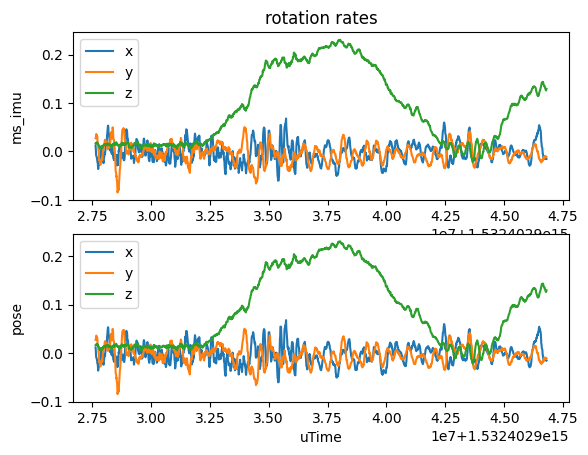

In [18]:
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
ms_imu_rot = np.array([(m['utime'], m['rotation_rate'][0], m['rotation_rate'][1], m['rotation_rate'][2]) for m in ms_imu])

plt.subplot(2, 1, 1)
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 1])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 2])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 3])
plt.title("rotation rates")
plt.ylabel('ms_imu')
plt.legend(['x', 'y', 'z'])

pose_rot = np.array([(m['utime'], m['rotation_rate'][0], m['rotation_rate'][1], m['rotation_rate'][2]) for m in pose])

plt.subplot(2, 1, 2)
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 1])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 2])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 3])
plt.xlabel('uTime')
plt.ylabel('pose')
plt.legend(['x', 'y', 'z'])


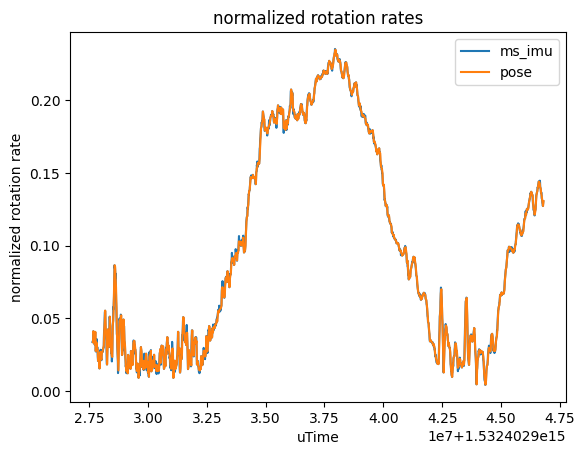

In [19]:
# IMU: Frequency: 100Hz; Pose: Frequency: 50Hz
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
pose_acc = np.array([(m['utime'], m['rotation_rate'][0], m['rotation_rate'][1], m['rotation_rate'][2]) for m in pose])

ms_imu_times = np.array([(m['utime'], np.linalg.norm(m['rotation_rate'])) for m in ms_imu])
pose_times = np.array([(m['utime'], np.linalg.norm(m['rotation_rate'])) for m in pose])
plt.plot(ms_imu_times[:, 0], ms_imu_times[:, 1])
plt.plot(pose_times[:, 0], pose_times[:, 1])
plt.title("normalized rotation rates")
plt.xlabel('uTime')
plt.ylabel('normalized rotation rate')
plt.legend(['ms_imu', 'pose']);

Text(0, 0.5, 'vel')

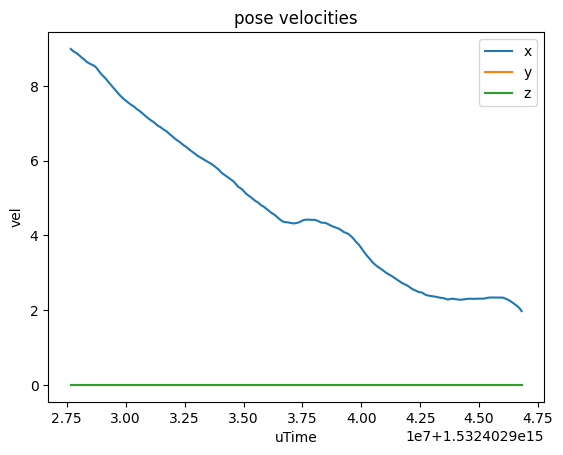

In [20]:
pose = nusc_can.get_messages(scene_name, 'pose')
pose_vel = np.array([(m['utime'], m['vel'][0], m['vel'][1], m['vel'][2]) for m in pose])
plt.plot(pose_vel[:, 0], pose_vel[:, 1])
plt.plot(pose_vel[:, 0], pose_vel[:, 2])
plt.plot(pose_vel[:, 0], pose_vel[:, 3])
plt.title("pose velocities")
plt.legend(['x', 'y', 'z'])
plt.xlabel('uTime')
plt.ylabel('vel')


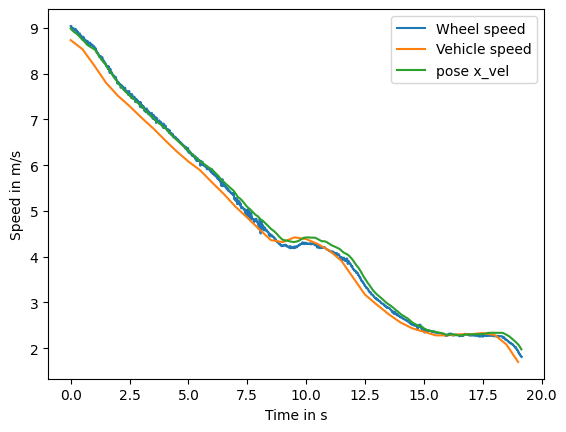

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Zoe Vehicle Info, 100hz
wheel_speed = nusc_can.get_messages(scene_name, 'zoe_veh_info')
wheel_speed = np.array([(m['utime'], m['FL_wheel_speed']) for m in wheel_speed])

# vehicle monitor, 2hz
veh_speed = nusc_can.get_messages(scene_name, 'vehicle_monitor')
veh_speed = np.array([(m['utime'], m['vehicle_speed']) for m in veh_speed])

# pose, 50hz
pose = nusc_can.get_messages(scene_name, 'pose')
pose_vel = np.array([(m['utime'], m['vel'][0], m['vel'][1], m['vel'][2]) for m in pose])
# plt.plot(pose_vel[:, 0], pose_vel[:, 1])
# plt.plot(pose_vel[:, 0], pose_vel[:, 2])
# plt.plot(pose_vel[:, 0], pose_vel[:, 3])

# Convert to m/s.
radius = 0.305  # Known Zoe wheel radius in meters.
circumference = 2 * np.pi * radius
wheel_speed[:, 1] *= circumference / 60
veh_speed[:, 1] *= 1 / 3.6

# Normalize time.
wheel_speed[:, 0] = (wheel_speed[:, 0] - wheel_speed[0, 0]) / 1e6
veh_speed[:, 0] = (veh_speed[:, 0] - veh_speed[0, 0]) / 1e6
pose_vel[:, 0] = (pose_vel[:, 0] - pose_vel[0, 0]) / 1e6
plt.plot(wheel_speed[:, 0], wheel_speed[:, 1])
plt.plot(veh_speed[:, 0], veh_speed[:, 1])
plt.plot(pose_vel[:, 0], pose_vel[:, 1])
plt.xlabel('Time in s')
plt.ylabel('Speed in m/s')
plt.legend(['Wheel speed', 'Vehicle speed', 'pose x_vel']);

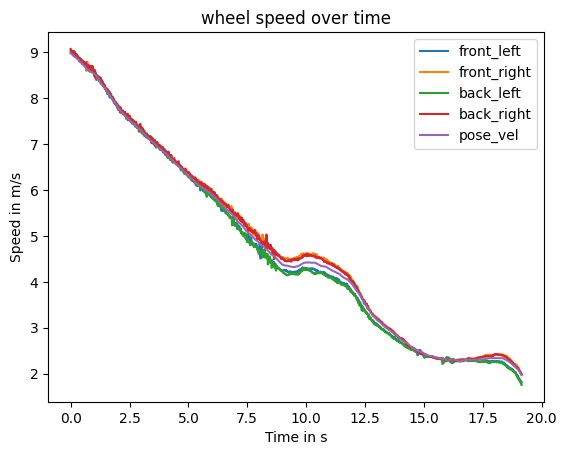

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Zoe Vehicle Info, 100hz
wheel_speed = nusc_can.get_messages(scene_name, 'zoe_veh_info')
wheel_speed_fl = np.array([(m['utime'], m['FL_wheel_speed']) for m in wheel_speed])
wheel_speed_fr = np.array([(m['utime'], m['FR_wheel_speed']) for m in wheel_speed])
wheel_speed_rl = np.array([(m['utime'], m['RL_wheel_speed']) for m in wheel_speed])
wheel_speed_rr = np.array([(m['utime'], m['RR_wheel_speed']) for m in wheel_speed])

# vehicle monitor, 2hz
veh_speed = nusc_can.get_messages(scene_name, 'vehicle_monitor')
veh_speed = np.array([(m['utime'], m['vehicle_speed']) for m in veh_speed])

# pose, 50hz
pose = nusc_can.get_messages(scene_name, 'pose')
pose_vel = np.array([(m['utime'], m['vel'][0], m['vel'][1], m['vel'][2]) for m in pose])
# plt.plot(pose_vel[:, 0], pose_vel[:, 1])
# plt.plot(pose_vel[:, 0], pose_vel[:, 2])
# plt.plot(pose_vel[:, 0], pose_vel[:, 3])

# Convert to m/s.
radius = 0.305  # Known Zoe wheel radius in meters.
circumference = 2 * np.pi * radius
wheel_speed_fl[:, 1] *= circumference / 60
wheel_speed_fr[:, 1] *= circumference / 60
wheel_speed_rl[:, 1] *= circumference / 60
wheel_speed_rr[:, 1] *= circumference / 60
veh_speed[:, 1] *= 1 / 3.6

# Normalize time.
wheel_speed_fl[:, 0] = (wheel_speed_fl[:, 0] - wheel_speed_fl[0, 0]) / 1e6
wheel_speed_fr[:, 0] = (wheel_speed_fr[:, 0] - wheel_speed_fr[0, 0]) / 1e6
wheel_speed_rl[:, 0] = (wheel_speed_rl[:, 0] - wheel_speed_rl[0, 0]) / 1e6
wheel_speed_rr[:, 0] = (wheel_speed_rr[:, 0] - wheel_speed_rr[0, 0]) / 1e6
veh_speed[:, 0] = (veh_speed[:, 0] - veh_speed[0, 0]) / 1e6
pose_vel[:, 0] = (pose_vel[:, 0] - pose_vel[0, 0]) / 1e6
plt.plot(wheel_speed_fl[:, 0], wheel_speed_fl[:, 1])
plt.plot(wheel_speed_fr[:, 0], wheel_speed_fr[:, 1])
plt.plot(wheel_speed_rl[:, 0], wheel_speed_rl[:, 1])
plt.plot(wheel_speed_rr[:, 0], wheel_speed_rr[:, 1])
# plt.plot(veh_speed[:, 0], veh_speed[:, 1])
plt.plot(pose_vel[:, 0], pose_vel[:, 1])
plt.xlabel('Time in s')
plt.ylabel('Speed in m/s')
plt.title("wheel speed over time")
# plt.legend(['front_left', 'front_right', 'back_left', 'back_right', "vehicle_speed", "pose_vel"]);
plt.legend(['front_left', 'front_right', 'back_left', 'back_right', "pose_vel"]);

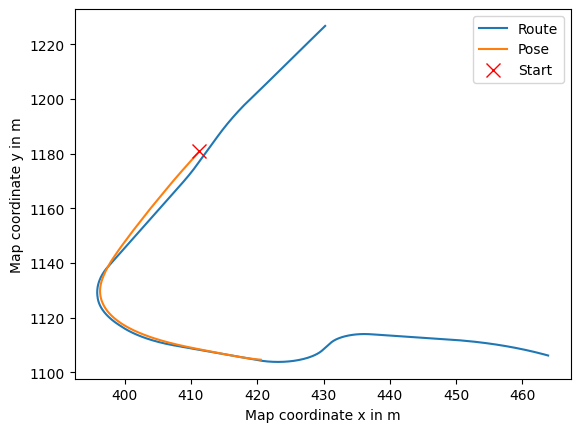

In [27]:
nusc_can.plot_baseline_route(scene_name)

In [25]:
misaligned_routes = nusc_can.list_misaligned_routes()
blacklist = nusc_can.can_blacklist

In [26]:
print(misaligned_routes)
print(blacklist)
print(my_scene['name'] in misaligned_routes)
print(int(my_scene['name'][-4:]) in blacklist)

['scene-0071', 'scene-0073', 'scene-0074', 'scene-0075', 'scene-0076', 'scene-0085', 'scene-0100', 'scene-0101', 'scene-0106', 'scene-0107', 'scene-0108', 'scene-0109', 'scene-0110', 'scene-0111', 'scene-0112', 'scene-0113', 'scene-0114', 'scene-0115', 'scene-0116', 'scene-0117', 'scene-0118', 'scene-0119', 'scene-0261', 'scene-0262', 'scene-0263', 'scene-0264', 'scene-0276', 'scene-0302', 'scene-0303', 'scene-0304', 'scene-0305', 'scene-0306', 'scene-0334', 'scene-0388', 'scene-0389', 'scene-0390', 'scene-0436', 'scene-0499', 'scene-0500', 'scene-0501', 'scene-0502', 'scene-0504', 'scene-0505', 'scene-0506', 'scene-0507', 'scene-0508', 'scene-0509', 'scene-0510', 'scene-0511', 'scene-0512', 'scene-0513', 'scene-0514', 'scene-0515', 'scene-0517', 'scene-0518', 'scene-0547', 'scene-0548', 'scene-0549', 'scene-0550', 'scene-0551', 'scene-0556', 'scene-0557', 'scene-0558', 'scene-0559', 'scene-0560', 'scene-0561', 'scene-0562', 'scene-0563', 'scene-0564', 'scene-0565', 'scene-0730', 'scen

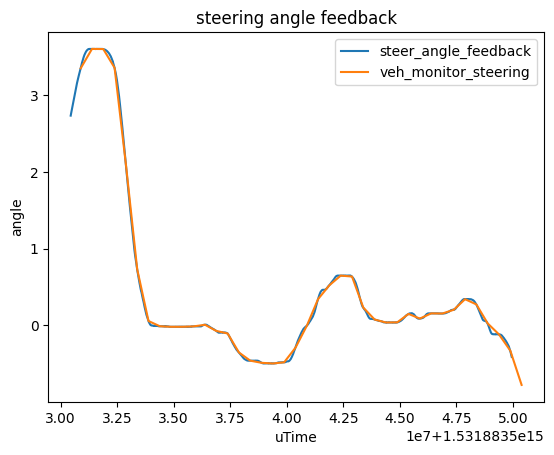

In [27]:
steer_angle_feedback = nusc_can.get_messages(scene_name, 'steeranglefeedback')
steer_angle = np.array([(m['utime'], m['value']) for m in steer_angle_feedback])
veh_monitor = nusc_can.get_messages(scene_name, 'vehicle_monitor')
veh_angle = np.array([(m['utime'], m['steering'] * np.pi / 180) for m in veh_monitor])
plt.plot(steer_angle[:, 0], steer_angle[:, 1])
plt.plot(veh_angle[:, 0], veh_angle[:, 1])
plt.title("steering angle feedback")
plt.xlabel('uTime')
plt.ylabel('angle')
plt.legend(['steer_angle_feedback', 'veh_monitor_steering']);

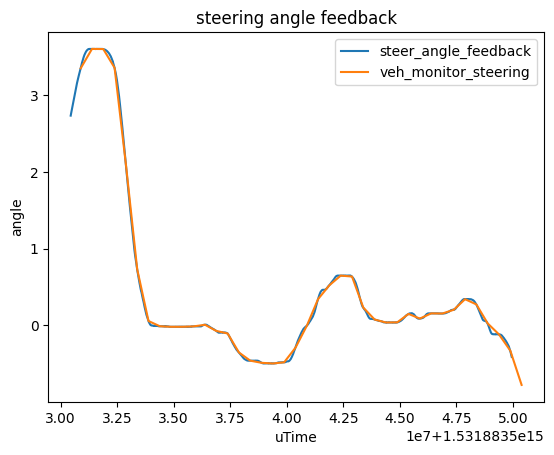

In [28]:
steer_angle_feedback = nusc_can.get_messages(scene_name, 'steeranglefeedback')
steer_angle = np.array([(m['utime'], m['value']) for m in steer_angle_feedback])
veh_monitor = nusc_can.get_messages(scene_name, 'vehicle_monitor')
veh_angle = np.array([(m['utime'], m['steering'] * np.pi / 180) for m in veh_monitor])
plt.plot(steer_angle[:, 0], steer_angle[:, 1])
plt.plot(veh_angle[:, 0], veh_angle[:, 1])
plt.title("steering angle feedback")
plt.xlabel('uTime')
plt.ylabel('angle')
plt.legend(['steer_angle_feedback', 'veh_monitor_steering']);

In [29]:
test = nusc_can.get_messages(scene_name, 'vehicle_monitor')
test[25]['steering'] * np.pi / 180


0.23212879051524105

In [30]:
test[25]['vehicle_speed']

20.94